In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/chirps/chirps-v2.0.monthly.nc')
 

data

<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 496)
Coordinates:
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2022-04-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [3]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1981-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 299)
Coordinates:
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time       (time) datetime64[ns] 1981-02-01 1981-03-01 ... 2005-12-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [4]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 100)
Coordinates:
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time       (time) datetime64[ns] 1981-06-01 1981-07-01 ... 2005-09-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [5]:
#for i in data.latitude.values:
 #   print(i)

In [6]:
#for i in data.longitude.values:
 #   print(i)

In [7]:
#to select the x and y coordinates
jjas_data = jjas_data.sel(longitude=slice(86,94),latitude=slice(18,28))
jjas_data

<xarray.Dataset>
Dimensions:    (latitude: 200, longitude: 160, time: 100)
Coordinates:
  * latitude   (latitude) float32 18.02 18.07 18.12 18.17 ... 27.88 27.92 27.97
  * longitude  (longitude) float32 86.02 86.08 86.12 86.17 ... 93.88 93.92 93.98
  * time       (time) datetime64[ns] 1981-06-01 1981-07-01 ... 2005-09-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [8]:
#interpolating to new lat and lon

new_lon = np.arange(86.125,94,0.25)
new_lat = np.arange(18.125,28,0.25)
jjas_data = jjas_data.interp(latitude=new_lat,longitude=new_lon)
jjas_data

<xarray.Dataset>
Dimensions:    (time: 100, latitude: 40, longitude: 32)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-01 1981-07-01 ... 2005-09-01
  * latitude   (latitude) float64 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88
  * longitude  (longitude) float64 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
Data variables:
    precip     (time, latitude, longitude) float64 nan nan nan ... 230.4 188.8
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [9]:
#getting the mean for JJAS data
jjas_mean = jjas_data.precip.mean('time')
 
jjas_mean

<xarray.DataArray 'precip' (latitude: 40, longitude: 32)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [248.97755749, 275.25243236, 338.84412057, ..., 204.03614261,
        273.31148629, 398.09106578],
       [313.03271664, 304.99211095, 340.8316294 , ..., 159.18378839,
        245.99790449, 286.82859662],
       [300.33862548, 273.78465935, 231.78277314, ..., 220.4120114 ,
        251.78057762, 284.67563873]])
Coordinates:
  * latitude   (latitude) float64 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88
  * longitude  (longitude) float64 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88

In [10]:
#changing unit from mm/month to mm/day
pr_mm = jjas_mean/30.4167



chirps = pr_mm

In [11]:
#opening the mpi data
 

data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/MPI-ESM-MR/mpi1_remap.nc')
 
data

<xarray.Dataset>
Dimensions:    (time: 432, bnds: 2, longitude: 32, latitude: 40)
Coordinates:
  * time       (time) datetime64[ns] 1970-01-16T12:00:00 ... 2005-12-16T12:00:00
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    pr         (time, latitude, longitude) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Thu Jul 07 17:29:35 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MPI-M-MPI-ESM-MR, histor...
    driving_model_id:                                MPI-M-MPI-ESM-MR
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [12]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1981-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 299, bnds: 2, longitude: 32, latitude: 40)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-16T12:00:00 ... 2005-11-16
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-01-01 1981-02-01 ... 2005-12-01
    pr         (time, latitude, longitude) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Thu Jul 07 17:29:35 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MPI-M-MPI-ESM-MR, histor...
    driving_model_id:                                MPI-M-MPI-ESM-MR
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [13]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 100, bnds: 2, longitude: 32, latitude: 40)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-16 ... 2005-09-16
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1981-06-01 1981-07-01 ... 2005-10-01
    pr         (time, latitude, longitude) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Thu Jul 07 17:29:35 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MPI-M-MPI-ESM-MR, histor...
    driving_model_id:                                MPI-M-MPI-ESM-MR
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [14]:
#jjas_data.x.values
#jjas_data.y.values


In [15]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(x=slice(1000000.,5275000.),y=slice(2000000.,4175000.))
#jjas_data

In [16]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean

<xarray.DataArray 'pr' (latitude: 40, longitude: 32)>
array([[6.9274342e-05, 7.1178903e-05, 7.4033363e-05, ..., 7.0084214e-05,
        4.4622648e-05, 3.6873360e-05],
       [6.7491041e-05, 6.8580179e-05, 6.9719739e-05, ..., 7.9002326e-05,
        5.2030860e-05, 4.4670858e-05],
       [6.3484134e-05, 6.5173997e-05, 6.5955959e-05, ..., 9.9189958e-05,
        5.9083417e-05, 5.6784571e-05],
       ...,
       [1.6982315e-04, 1.8295158e-04, 1.9779867e-04, ..., 1.9406591e-04,
        2.0854187e-04, 1.7648423e-04],
       [1.6972734e-04, 1.7873672e-04, 2.0997610e-04, ..., 1.8433477e-04,
        2.3208171e-04, 2.3971204e-04],
       [1.8994648e-04, 3.1547513e-04, 4.6368729e-04, ..., 1.8041603e-04,
        2.4548615e-04, 2.7364705e-04]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88

In [17]:
mpi = jjas_mean*86400
mpi

<xarray.DataArray 'pr' (latitude: 40, longitude: 32)>
array([[ 5.98530311,  6.14985726,  6.39648261, ...,  6.05527607,
         3.85539676,  3.1858583 ],
       [ 5.83122591,  5.92532745,  6.02378547, ...,  6.82580096,
         4.49546634,  3.85956215],
       [ 5.48502922,  5.63103338,  5.69859487, ...,  8.57001236,
         5.10480723,  4.90618693],
       ...,
       [14.67272015, 15.80701671, 17.08980496, ..., 16.76729489,
        18.01801734, 15.24823755],
       [14.66444219, 15.44285277, 18.14193539, ..., 15.92652421,
        20.05186016, 20.71112031],
       [16.41137623, 27.25705141, 40.06258193, ..., 15.58794477,
        21.21000364, 23.64310501]])
Coordinates:
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88

In [18]:
bias = mpi - chirps
bias

<xarray.DataArray (latitude: 40, longitude: 32)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ 6.48716559,  6.75763159,  5.94973649, ..., 10.05926468,
         9.03244407,  2.16032644],
       [ 4.37296689,  5.41572586,  6.93652424, ..., 10.69309032,
        11.96426668, 11.28114939],
       [ 6.53724046, 18.25592179, 32.44233473, ...,  8.34153042,
        12.9322951 , 14.28391619]])
Coordinates:
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88

In [19]:
bias_percentage = ((mpi - chirps)/chirps)*100
bias_percentage

<xarray.DataArray (latitude: 40, longitude: 32)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [ 79.25138779,  74.6750359 ,  53.40843739, ..., 149.95854753,
        100.52162292,  16.5062738 ],
       [ 42.49115664,  54.0107442 ,  61.90334426, ..., 204.32264095,
        147.93358143, 119.63079713],
       [ 66.20569753, 202.81811905, 425.73861267, ..., 115.11252344,
        156.23037485, 152.61916875]])
Coordinates:
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88

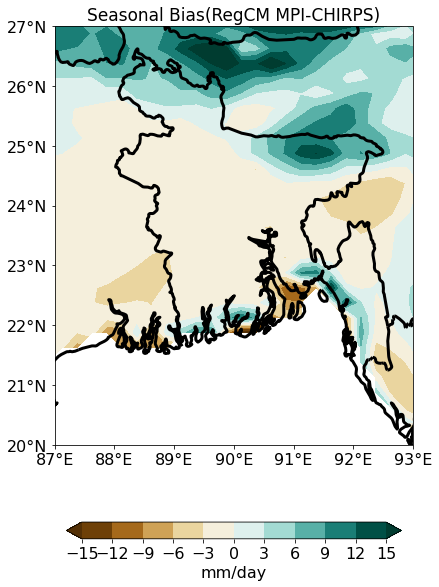

In [23]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature
plt.rcParams['font.size'] = '16'


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias['longitude'], bias['latitude'],bias[:,:],
                levels=np.arange(-15,15+3,3),   transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, ticks=np.arange(-15,15+3,3), orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)

plt.title('Seasonal Bias(RegCM MPI-CHIRPS)',fontsize=17)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias(mpi-chirps).png")



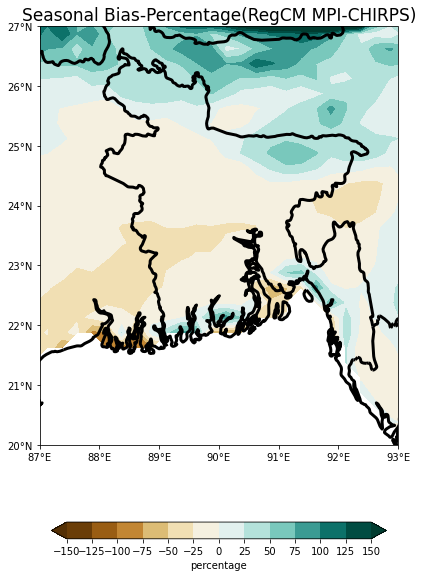

In [21]:
# Plotting bias percentage 

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias_percentage['longitude'], bias_percentage['latitude'],bias_percentage[:,:],
                levels=np.arange(-150,150+25,25),  transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1,ticks=np.arange(-150,150+25,25),orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'percentage')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)


plt.title('Seasonal Bias-Percentage(RegCM MPI-CHIRPS)',fontsize=17)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias_percentage(mpi-chirps).png")







In [22]:
#cma colors
'''Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, 
BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,
Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, 
Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,
RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, 
Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,
autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,
gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r,
gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma,
magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
ter'''

'Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, \nBrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,\nGreens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, \nPastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,\nRdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, \nSpectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,\nautumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, \ncopper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,\ngist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r